# <font color='red'> Spoken Digit Recognition</font>


In this notebook, You will do Spoken Digit Recognition. 

Input - speech signal, output - digit number



It contains  

1. Reading the dataset. and Preprocess the data set. Detailed instrctions are given below. You have to write the code in the same cell which contains the instrction. 
2. Training the LSTM with RAW data
3. Converting to spectrogram and Training the LSTM network
4. Creating the augmented data and doing step 2 and 3 again.  
5. [files](https://drive.google.com/open?id=1ulbWjQCcBMqwZGqwsLlCXb-Paf5MWeN_)

<font size=5>Instructions:</font>

    1. Don't change any Grader Functions. Don't manipulate any Grader functions. If you manipulate any, it will be considered as plagiarised. 
    
    2. Please read the instructions on the code cells and markdown cells. We will explain what to write. 
    
    3. Please return outputs in the same format what we asked. Eg. Don't return List of we are asking for a numpy array.
    
    4. Please read the external links that we are given so that you will learn the concept behind the code that you are writing.
    
    5. We are giving instructions at each section if necessary, please follow them. 

<font size=5>Every Grader function has to return True. </font>



> 1. Librosa is a Python package for music and audio analysis
> 2. Librosa helps to visualize the audio signals and also do the feature extractions in it using different signal processing techniques
> ref:#ref:https://www.geeksforgeeks.org/how-to-install-librosa-library-in-python/


In [1]:
!git clone https://github.com/AllenDowney/ThinkDSP.git 

Cloning into 'ThinkDSP'...
remote: Enumerating objects: 2469, done.
remote: Total 2469 (delta 0), reused 0 (delta 0), pack-reused 2469
Receiving objects: 100% (2469/2469), 208.82 MiB | 35.41 MiB/s, done.
Resolving deltas: 100% (1353/1353), done.


In [2]:
import numpy as np
import pandas as pd
import librosa
import os
import sys
import matplotlib.pyplot as plt
import IPython

sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
#ref:https://www.bing.com/ck/a?!&&p=a7fdc831dd6cababJmltdHM9MTY2ODI5NzYwMCZpZ3VpZD0yY2ZlZGQ3MC03YTVkLTYwMzgtMjAzNC1jY2Q5N2JmMDYxMWQmaW5zaWQ9NTE3Mg&ptn=3&hsh=3&fclid=2cfedd70-7a5d-6038-2034-ccd97bf0611d&psq=clone+github+repository+jupyter+notebook&u=a1aHR0cHM6Ly9naXRodWIuY29tL2VuY29yZXNoYW8vanVweXRlci1ub3RlYm9vaw&ntb=1

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm

import tensorflow as tf

In [3]:
!wget --header="Host: doc-04-5g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36 Edg/107.0.1418.42" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: AUTH_9t3le2gft24lgabjru9ved1l1kqv9jtc_nonce=gl88usdad6nh2" --header="Connection: keep-alive" "https://doc-04-5g-docs.googleusercontent.com/docs/securesc/l3b70an1taujoqgi7rtb31vej2egv2ar/v1lvjevkq84tfbrb2olddad0nod5grp6/1668510450000/00484516897554883881/07694293124473950479/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&ax=AEKYgyTbQagtykSezpwbsFW-8oHfJj93bNICtpN_BDm6OL2dFClxZQmWuxKN4A7WtGzftKwNdk8OThJCT1tRY4p0Cg9ylGEEEylGLFiZmstvX1lKLt6-E4I1nhmHsfpYbKDHZTL4lNm7uAex0p6OdBMdzxkqq3FVQ0NtvSRiXhLDNJEPj6JJpfAQ4U-3kjaCtaylSoLEGSmLpZktRlcRVjNk9Gb6lpVI3Of1j_rvu89ySjy5WpxjaTe10EgoSc3HEEvtV3fIcTXRTsf90WxyyIfyNTq6i4PhQ2UdTtbT4tKKy7zdKSMxlk10yzDj2Jk8tEI8AD4qeFADmFIm2EBKl42MXaLNNVFHKQ9EnwQ6AY9dKZCScyqVwWEcpYb5p2M-zliuQKseqHd7EdC7IHzx1QYyiKS3R7DqWYfPPZTVX7l1c0xz1Axh925tGG4n8aupu16avxw5njY3hcm06ewGT1JGe491583Vp124ERtkMylp6crRGCTfGoHlHZf3FxgIBhp99I8zmDvtiyKcHf03B_l6WG7wL1ogNLczBvZPzcjhxVcXdvYU1Joo5BANUEHiqcFVM0qD8colIaQ_dObQe5SA4tm2pG0stadcHs17IQm_oR7o_TNEb7lim7EM1e4WUiE-MFxt9W-zd9pwirM5so5UNupg_ZLhAgt06jRlLWyxhqThVODOQpNDtsxd8ajKo5ZQ4T-BVycDLjhycLSqs26TZoMtMdvrzSASkiWolKkvZaiReU6ziOqUJheNdkPjoKO7V2bfc-eL0zizUF4DlWNsSJPLzhwCaIBNB_nY_lJTK-7vHWI9u53eoujnVWs-nY8elmsIR9-njdO7mtVrV0EyOfDIPSnnOCinQjiT6RvKMXZRlSPLcRb6UEUzy0mMWRnIDba6YcAU8FdFrNA2BoaqR6U13BZ7A-FANURzLA&uuid=91ed90bb-50cf-4afb-b276-0ac2e9af02b6&authuser=0&nonce=gl88usdad6nh2&user=07694293124473950479&hash=6d4ufgd8pf80uu0o97hdktb68nasksll" -c -O 'recordings.zip'

--2022-11-15 11:09:08--  https://doc-04-5g-docs.googleusercontent.com/docs/securesc/l3b70an1taujoqgi7rtb31vej2egv2ar/v1lvjevkq84tfbrb2olddad0nod5grp6/1668510450000/00484516897554883881/07694293124473950479/17YGQheavMbM6aeHYjUcGssXfb7eQHo1z?e=download&ax=AEKYgyTbQagtykSezpwbsFW-8oHfJj93bNICtpN_BDm6OL2dFClxZQmWuxKN4A7WtGzftKwNdk8OThJCT1tRY4p0Cg9ylGEEEylGLFiZmstvX1lKLt6-E4I1nhmHsfpYbKDHZTL4lNm7uAex0p6OdBMdzxkqq3FVQ0NtvSRiXhLDNJEPj6JJpfAQ4U-3kjaCtaylSoLEGSmLpZktRlcRVjNk9Gb6lpVI3Of1j_rvu89ySjy5WpxjaTe10EgoSc3HEEvtV3fIcTXRTsf90WxyyIfyNTq6i4PhQ2UdTtbT4tKKy7zdKSMxlk10yzDj2Jk8tEI8AD4qeFADmFIm2EBKl42MXaLNNVFHKQ9EnwQ6AY9dKZCScyqVwWEcpYb5p2M-zliuQKseqHd7EdC7IHzx1QYyiKS3R7DqWYfPPZTVX7l1c0xz1Axh925tGG4n8aupu16avxw5njY3hcm06ewGT1JGe491583Vp124ERtkMylp6crRGCTfGoHlHZf3FxgIBhp99I8zmDvtiyKcHf03B_l6WG7wL1ogNLczBvZPzcjhxVcXdvYU1Joo5BANUEHiqcFVM0qD8colIaQ_dObQe5SA4tm2pG0stadcHs17IQm_oR7o_TNEb7lim7EM1e4WUiE-MFxt9W-zd9pwirM5so5UNupg_ZLhAgt06jRlLWyxhqThVODOQpNDtsxd8ajKo5ZQ4T-BVycDLjhycLSqs26TZoMtMdvrzSASkiWolK

We shared recordings.zip, please unzip those. 

In [4]:
!unzip recordings.zip 

Archive:  recordings.zip
   creating: recordings/
  inflating: recordings/0_jackson_0.wav  
  inflating: recordings/0_jackson_1.wav  
  inflating: recordings/0_jackson_10.wav  
  inflating: recordings/0_jackson_11.wav  
  inflating: recordings/0_jackson_12.wav  
  inflating: recordings/0_jackson_13.wav  
  inflating: recordings/0_jackson_14.wav  
  inflating: recordings/0_jackson_15.wav  
  inflating: recordings/0_jackson_16.wav  
  inflating: recordings/0_jackson_17.wav  
  inflating: recordings/0_jackson_18.wav  
  inflating: recordings/0_jackson_19.wav  
  inflating: recordings/0_jackson_2.wav  
  inflating: recordings/0_jackson_20.wav  
  inflating: recordings/0_jackson_21.wav  
  inflating: recordings/0_jackson_22.wav  
  inflating: recordings/0_jackson_23.wav  
  inflating: recordings/0_jackson_24.wav  
  inflating: recordings/0_jackson_25.wav  
  inflating: recordings/0_jackson_26.wav  
  inflating: recordings/0_jackson_27.wav  
  inflating: recordings/0_jackson_28.wav  
  infla

In [5]:
#read the all file names in the recordings folder given by us
#(if you get entire path, it is very useful in future)
#save those files names as list in "all_files"
all_files = os.listdir('/content/recordings')

<font size=4>Grader function 1 </font>

In [6]:
def grader_files():
    temp = len(all_files)==2000
    temp1 = all([x[-3:]=="wav" for x in all_files])
    temp = temp and temp1
    return temp
grader_files()

True

Create a dataframe(name=df_audio) with two columns(path, label).   
You can get the label from the first letter of name.  
Eg: 0_jackson_0 --> 0  
0_jackson_43 --> 0

## Exploring the sound dataset

In [7]:
#It is a good programming practise to explore the dataset that you are dealing with. This dataset is unique in itself because it has sounds as input
#https://colab.research.google.com/github/Tyler-Hilbert/AudioProcessingInPythonWorkshop/blob/master/AudioProcessingInPython.ipynb
#visualize the data and write code to play 2-3 sound samples in the notebook for better understanding.
#please go through the following reference video https://www.youtube.com/watch?v=37zCgCdV468

In [8]:
def visual_spectrum(audio_file):
    wave = thinkdsp.read_wave(audio_file)

    # Grab first 10 seconds of audio (you can ignore me)
    clipLength = 10 # in seconds
    index = 0
    while (index < wave.ts.size and wave.ts[index] < clipLength):
        index += 1
    # Remove extras
    wave.ts = wave.ts[:index]
    wave.ys = wave.ys[:index]

    # Plot spectrum of audio file
    spectrum = wave.make_spectrum()
    spectrum.plot()
    plt.show()

    # Play audio file
    wave.play()
    IPython.display.Audio('sound.wav')

### Sound-1

In [9]:
#considering a random audio file
path ='/content/recordings'

audio_file = path+'/'+all_files[999]

#reading the file
wave = thinkdsp.read_wave(audio_file)
#playing the file
wave.play()
IPython.display.Audio('sound.wav')



Writing sound.wav


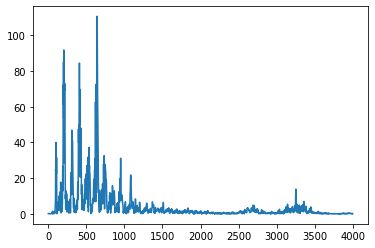

Writing sound.wav


In [10]:
visual_spectrum(audio_file)

### Sound-2

In [11]:
#considering a random audio file
audio_file = path+'/'+all_files[46]

#reading the file
wave = thinkdsp.read_wave(audio_file)
#playing the file
wave.play()
IPython.display.Audio('sound.wav')


Writing sound.wav


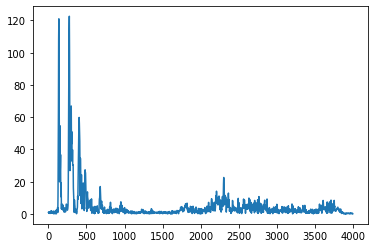

Writing sound.wav


In [12]:
visual_spectrum(audio_file)

## Creating dataframe

In [13]:
#Create a dataframe(name=df_audio) with two columns(path, label).   
#You can get the label from the first letter of name.  
#Eg: 0_jackson_0 --> 0  
#0_jackson_43 --> 0


In [14]:
#extracting labels from the files
label =[]
for file_name in all_files:
    label.append(file_name[0])

len(label)==len(all_files)

True

In [15]:
#creating dataframe
df_audio = pd.DataFrame(zip(all_files,label),columns=['path','label'])

#converting label column from str to int
df_audio.label = df_audio.label.astype(int)

df_audio.dtypes

path     object
label     int64
dtype: object

In [16]:
df_audio.head(5)

,path,label
0,9_theo_18.wav,9
1,8_jackson_44.wav,8
2,9_theo_14.wav,9
3,7_nicolas_10.wav,7
4,3_theo_36.wav,3


In [17]:
#info
df_audio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    2000 non-null   object
 1   label   2000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


<font size=4>Grader function 2 </font>

In [18]:
def grader_df():
    flag_shape = df_audio.shape==(2000,2)
    flag_columns = all(df_audio.columns==['path', 'label'])
    list_values = list(df_audio.label.value_counts())
    flag_label = len(list_values)==10
    flag_label2 = all([i==200 for i in list_values])
    final_flag = flag_shape and flag_columns and flag_label and flag_label2
    return final_flag
grader_df()

True

In [19]:
from sklearn.utils import shuffle
df_audio = shuffle(df_audio, random_state=33)#don't change the random state

In [20]:
from collections import Counter
Counter(df_audio['label'])

Counter({1: 200,
         4: 200,
         7: 200,
         8: 200,
         9: 200,
         3: 200,
         6: 200,
         0: 200,
         5: 200,
         2: 200})

<pre><font size=4>Train and Validation split</font></pre>

In [21]:
#split the data into train and validation and save in X_train, X_test, y_train, y_test
#use stratify sampling
#use random state of 45
#use test size of 30%
X = df_audio['path']
y = df_audio['label']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=45, stratify=y)

<font size=4>Grader function 3 </font>

In [22]:
def grader_split():
    flag_len = (len(X_train)==1400) and (len(X_test)==600) and (len(y_train)==1400) and (len(y_test)==600)
    values_ytrain = list(y_train.value_counts())
    flag_ytrain = (len(values_ytrain)==10) and (all([i==140 for i in values_ytrain]))
    values_ytest = list(y_test.value_counts())
    flag_ytest = (len(values_ytest)==10) and (all([i==60 for i in values_ytest]))
    final_flag = flag_len and flag_ytrain and flag_ytest
    return final_flag
grader_split()

True

<pre><font size=4>Preprocessing</font>

All files are in the "WAV" format. We will read those raw data files using the librosa</pre>

In [23]:
sample_rate = 22050
def load_wav(x, get_duration=True):
    '''This return the array values of audio with sampling rate of 22050 and Duration'''
    #loading the wav file with sampling rate of 22050
    samples, sample_rate = librosa.load(x, sr=22050)
    if get_duration:
        duration = librosa.get_duration(y=samples, sr=sample_rate)
        return [samples, duration]
    else:
        return samples        

In [24]:
#use load_wav function that was written above to get every wave. 
#save it in X_train_processed and X_test_processed
# X_train_processed/X_test_processed should be dataframes with two columns(raw_data, duration) with same index of X_train/y_train

X_train_processed_list = []

for file in tqdm(X_train):
    audio_file = path+'//'+file
    X_train_processed_list.append(load_wav(x=audio_file))
    
X_train_processed = pd.DataFrame(X_train_processed_list,columns=['raw_data','duration'])

X_train_processed.head(4)


  0%|          | 0/1400 [00:00<?, ?it/s]

,raw_data,duration
0,"[-0.004207985, -0.0012800224, 0.002231387, 0.0...",0.714785
1,"[-0.009735501, -0.011580857, -0.011850291, -0....",0.497778
2,"[-0.00081584335, -0.0010460584, -0.0011035796,...",0.341406
3,"[0.00022961154, 2.9221865e-05, -0.00018950077,...",0.579410


In [25]:
X_test_processed_list = []

for file in tqdm(X_test):
    audio_file = path+'//'+file
    X_test_processed_list.append(load_wav(x=audio_file))
    
X_test_processed = pd.DataFrame(X_test_processed_list,columns=['raw_data','duration'])

X_test_processed.head(4)


  0%|          | 0/600 [00:00<?, ?it/s]

,raw_data,duration
0,"[0.00022344386, -8.921857e-05, -0.0006818668, ...",0.257642
1,"[0.0011965998, 0.0010688655, -0.00026163404, -...",0.438141
2,"[-0.058849696, -0.028578708, 0.014512337, 0.04...",0.588163
3,"[-0.0001804145, -0.00012280767, 7.741404e-05, ...",0.337642


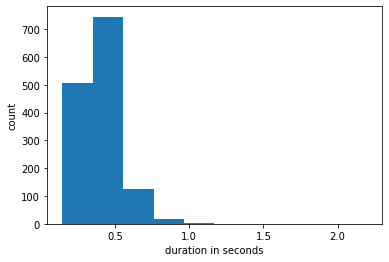

In [26]:
#plot the histogram of the duration for trian
plt.hist(x=X_train_processed['duration'])
plt.xlabel('duration in seconds')
plt.ylabel('count')
plt.show()


In [27]:
#print 0 to 100 percentile values with step size of 10 for train data duration. 
a = list(X_train_processed['duration'])
for per in range(0,110,10):
    print(f'{per} th percentile is{np.percentile(a, per)}')

0 th percentile is0.1435374149659864
10 th percentile is0.26312925170068024
20 th percentile is0.30080725623582766
30 th percentile is0.3322902494331066
40 th percentile is0.35908390022675735
50 th percentile is0.3913378684807256
60 th percentile is0.4201360544217687
70 th percentile is0.45006349206349205
80 th percentile is0.4867392290249433
90 th percentile is0.5600952380952383
100 th percentile is2.195918367346939


In [28]:
##print 90 to 100 percentile values with step size of 1. 
for per in range(90,101,1):
    print(f'{per} th percentile is{np.percentile(a, per)}')

90 th percentile is0.5600952380952383
91 th percentile is0.5755346938775511
92 th percentile is0.5864362811791388
93 th percentile is0.6091043083900228
94 th percentile is0.6202721088435375
95 th percentile is0.6294943310657596
96 th percentile is0.6456780045351473
97 th percentile is0.6652689342403628
98 th percentile is0.7050403628117913
99 th percentile is0.7930485260770975
100 th percentile is2.195918367346939


<font size=4>Grader function 4 </font>

In [29]:
def grader_processed():
    flag_columns = (all(X_train_processed.columns==['raw_data', 'duration'])) and (all(X_test_processed.columns==['raw_data', 'duration']))
    flag_shape = (X_train_processed.shape ==(1400, 2)) and (X_test_processed.shape==(600,2))
    return flag_columns and flag_shape
grader_processed()

True

<b>Based on our analysis 99 percentile values are less than 0.8sec so we will limit maximum length of X_train_processed and X_test_processed to 0.8 sec. It is similar to pad_sequence for a text dataset.</b>

<b>While loading the audio files, we are using sampling rate of 22050 so one sec will give array of length 22050. so, our maximum length is 0.8*22050 = 17640
</b>
<b>Pad with Zero if length of sequence is less than 17640 else Truncate the number. </b>

<b> Also create a masking vector for train and test. </b>

<b> masking vector value = 1 if it is real value, 0 if it is pad value. Masking vector data type must be bool.</b>


> To know more about masking and padding => ref:https://keras.io/guides/understanding_masking_and_padding/

In [30]:
max_length  = 17640

seq_len = [len(sq) for sq in X_train_processed['raw_data'] ]
print("maximum length in the train raw_data =",max(seq_len))
print("minimum length in the train raw_data =",min(seq_len))
print()
print(X_train_processed['raw_data'][99])
print(len(X_train_processed['raw_data'][99]))

maximum length in the train raw_data = 48420
minimum length in the train raw_data = 3165

[-0.01277288 -0.00410267  0.00631919 ... -0.00797526 -0.00465371
  0.        ]
10874


In [31]:
## as discussed above, Pad with Zero if length of sequence is less than 17640 else Truncate the number. 
## save in the X_train_pad_seq, X_test_pad_seq
## also Create masking vector X_train_mask, X_test_mask

## all the X_train_pad_seq, X_test_pad_seq, X_train_mask, X_test_mask will be numpy arrays mask vector dtype must be bool.

> <b>Padding</b> is a special form of masking where the masked steps are at the start or the end of a sequence. Padding comes from the need to encode sequence data into contiguous batches: in order to make all sequences in a batch fit a given standard length, it is necessary to pad or truncate some sequences.

In [32]:
X_train_pad_seq = tf.keras.utils.pad_sequences(sequences = X_train_processed['raw_data'].values, 
                                                maxlen = max_length, 
                                                dtype='float32',
                                                padding='post',
                                                truncating='post',        
                                                value = 0.0
                                                )

X_test_pad_seq = tf.keras.utils.pad_sequences(sequences = X_test_processed['raw_data'].values, 
                                                maxlen = max_length, 
                                                dtype='float32',
                                                padding='post',
                                                truncating='post',   
                                                value = 0.0
                                                )

print(X_train_pad_seq[99])
print(len(X_train_pad_seq[99]))

[-0.01277288 -0.00410267  0.00631919 ...  0.          0.
  0.        ]
17640


> <b>Masking</b> is a way to tell sequence-processing layers that certain timesteps in an input are missing, and thus should be skipped when processing the data.

> After padding , Now that all samples have a uniform length, the model must be informed that some part of the data is actually padding and should be ignored. That mechanism is masking.

In [33]:
X_train_mask = np.where(X_train_pad_seq != 0, 1, 0) 
X_train_mask = X_train_mask.astype(bool)

X_test_mask = np.where(X_test_pad_seq != 0, 1, 0)
X_test_mask = X_test_mask.astype(bool)

<font size=4>Grader function 5 </font>

In [34]:
def grader_padoutput():
    flag_padshape = (X_train_pad_seq.shape==(1400, 17640)) and (X_test_pad_seq.shape==(600, 17640)) and (y_train.shape==(1400,))
    flag_maskshape = (X_train_mask.shape==(1400, 17640)) and (X_test_mask.shape==(600, 17640)) and (y_test.shape==(600,))
    flag_dtype = (X_train_mask.dtype==bool) and (X_test_mask.dtype==bool)
    return flag_padshape and flag_maskshape and flag_dtype
grader_padoutput()

True

### 1. Giving Raw data directly. 


Now we have

Train data: X_train_pad_seq, X_train_mask and y_train  
Test data: X_test_pad_seq, X_test_mask and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_pad_seq" as input, "X_train_mask" as mask input. You can use any number of LSTM cells. Please read LSTM documentation(https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) in tensorflow to know more about mask and also https://www.tensorflow.org/guide/keras/masking_and_padding 
2. Get the final output of the LSTM and give it to Dense layer of any size and then give it to Dense layer of size 10(because we have 10 outputs) and then compile with the sparse categorical cross entropy( because we are not converting it to one hot vectors). Also check the datatype of class labels(y_values) and make sure that you convert your class labels  to integer datatype before fitting in the model.
3. While defining your model make sure that you pass both the input layer and mask input layer as input to lstm layer as follows
<img src='https://i.imgur.com/FvcgvbY.jpg'>
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 

5. make sure that it won't overfit. 
6. You are free to include any regularization


In [35]:
from tensorflow.keras.layers import Input, LSTM, Dense, GlobalAveragePooling1D
from tensorflow.keras.models import Model
import tensorflow as tf
from sklearn.metrics import f1_score

In [36]:

class Metrics(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.x_test = validation_data[0]
        self.y_test = validation_data[1]
        
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.x_test)))
        val_label = np.argmax(val_predict, axis = 1)
        val_targ = self.y_test
        val_f1 = f1_score(val_targ, val_label, average='micro')
        print("val_F1_score: ", val_f1)
        
metrics = Metrics(validation_data=([X_test_pad_seq,X_test_mask], y_test))

In [37]:
## as discussed above, please write the architecture of the model.
## you will have two input layers in your model (data input layer and mask input layer)
## make sure that you have defined the data type of masking layer as bool


In [38]:
input_layer= Input(shape=(17640,1),name='pad_sequence layer',dtype='float32')

masking_input_layer = Input(shape=(17640,),name='masked_input layer',dtype='bool')

lstm_layer = LSTM(units=128,activation='tanh')(inputs=input_layer, mask=masking_input_layer)

lstm_output = Dense(units=128, activation='relu',kernel_initializer='he_uniform')(lstm_layer)


output_layer = Dense(units=10, activation='softmax')(lstm_output)

model_1 = Model(inputs=[input_layer,masking_input_layer],
                outputs=output_layer)

model_1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pad_sequence layer (InputLayer  [(None, 17640, 1)]  0           []                               
 )                                                                                                
                                                                                                  
 masked_input layer (InputLayer  [(None, 17640)]     0           []                               
 )                                                                                                
                                                                                                  
 lstm (LSTM)                    (None, 128)          66560       ['pad_sequence layer[0][0]',     
                                                                  'masked_input layer[0][0]'] 

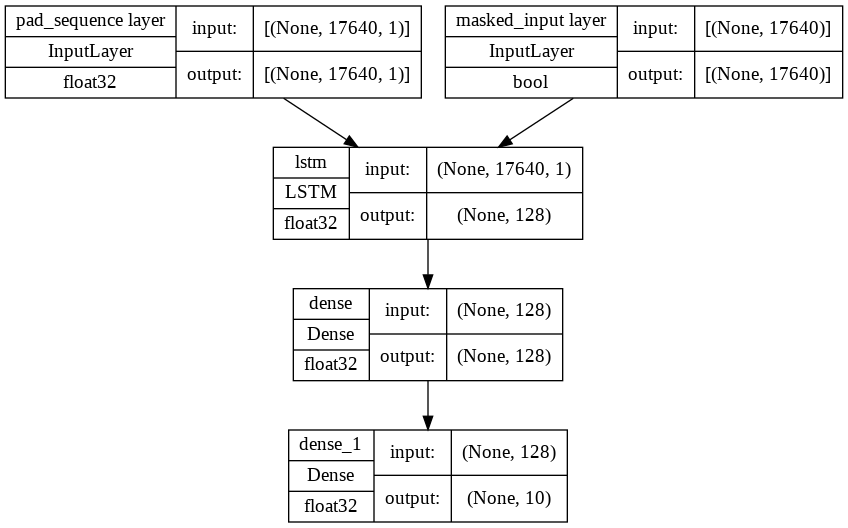

In [39]:
tf.keras.utils.plot_model(model_1, to_file='model_mask.png',show_shapes=True,show_dtype=True,show_layer_names=True)


In [40]:
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)
import datetime

%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

model_1.compile(optimizer='Adam',
              loss='SparseCategoricalCrossentropy',
              metrics = ['Accuracy'])

model_1.fit(x=[X_train_pad_seq,X_train_mask],
          y=y_train,
          validation_data=([X_test_pad_seq,X_test_mask],y_test),
          epochs=3,
          verbose=1,
          callbacks=[metrics,tensorboard_callback])



Epoch 1/3
19/19 [==============================] - 5s 219ms/step
val_F1_score:  0.10666666666666669
44/44 [==============================] - 46s 837ms/step - loss: 2.3043 - Accuracy: 0.0929 - val_loss: 2.3026 - val_Accuracy: 0.1067
Epoch 2/3
19/19 [==============================] - 4s 219ms/step
val_F1_score:  0.09
44/44 [==============================] - 33s 755ms/step - loss: 2.3036 - Accuracy: 0.0971 - val_loss: 2.3026 - val_Accuracy: 0.0900
Epoch 3/3
19/19 [==============================] - 4s 218ms/step
val_F1_score:  0.10000000000000002
44/44 [==============================] - 33s 743ms/step - loss: 2.3033 - Accuracy: 0.0871 - val_loss: 2.3026 - val_Accuracy: 0.1000


In [ ]:
tensorboard --logdir logs/fit


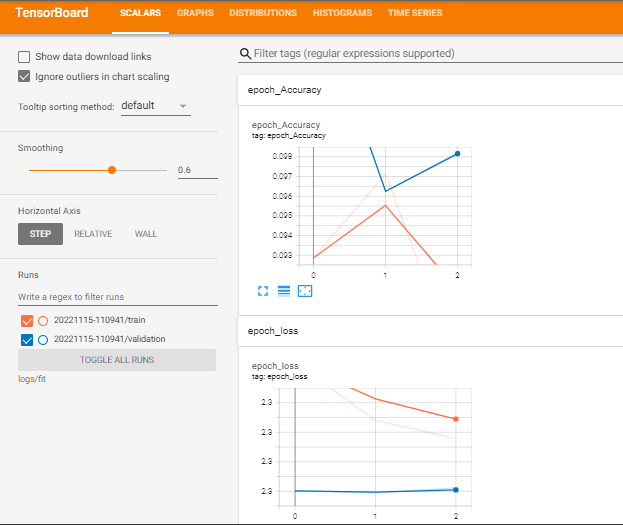

### 2. Converting into spectrogram and giving spectrogram data as input  

We can use librosa to convert raw data into spectrogram. A spectrogram shows the features in a two-dimensional representation with the
intensity of a frequency at a point in time i.e we are converting Time domain to frequency domain. you can read more about this in https://pnsn.org/spectrograms/what-is-a-spectrogram


In [42]:
def convert_to_spectrogram(raw_data):
    '''converting to spectrogram'''
    spectrum = librosa.feature.melspectrogram(y=raw_data, sr=sample_rate, n_mels=64)
    logmel_spectrum = librosa.power_to_db(S=spectrum, ref=np.max)
    return logmel_spectrum

In [43]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram =[]
for raw_data in tqdm(X_train_pad_seq):
 X_train_spectrogram.append(np.array(convert_to_spectrogram(raw_data)))

X_train_spectrogram = np.array(X_train_spectrogram)
print(type(X_train_spectrogram))


print("===="*30)

X_test_spectrogram =[]
for raw_data in tqdm(X_test_pad_seq):
 X_test_spectrogram.append(np.array(convert_to_spectrogram(raw_data)))

X_test_spectrogram = np.array(X_test_spectrogram)
print(type(X_test_spectrogram))


  0%|          | 0/1400 [00:00<?, ?it/s]

<class 'numpy.ndarray'>


  0%|          | 0/600 [00:00<?, ?it/s]

<class 'numpy.ndarray'>


<font size=4>Grader function 6 </font>

In [44]:
def grader_spectrogram():
    flag_shape = (X_train_spectrogram.shape==(1400,64, 35)) and (X_test_spectrogram.shape == (600, 64, 35))
    return flag_shape
grader_spectrogram()

True


Now we have

Train data: X_train_spectrogram and y_train  
Test data: X_test_spectrogram and y_test   

We will create a LSTM model which takes this input. 

Task:

1. Create an LSTM network which takes "X_train_spectrogram" as input and has to return output at every time step. 
2. Average the output of every time step and give this to the Dense layer of any size. 
(ex: Output from LSTM will be  (None, time_steps, features) average the output of every time step i.e, you should get (None,time_steps) 
and then pass to dense layer )
3. give the above output to Dense layer of size 10( output layer) and train the network with sparse categorical cross entropy.  
4. Use tensorboard to plot the graphs of loss and metric(use custom micro F1 score as metric) and histograms of gradients. You can write your code for computing F1 score using this <a  href='https://i.imgur.com/8YULUcu.jpg'>link</a> 
5. make sure that it won't overfit. 
6. You are free to include any regularization


In [45]:
X_train_spectrogram[1].shape

(64, 35)

In [46]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above
input_layer= Input(shape=(64,35),name='spectrogram',dtype='float32')

lstm_layer = LSTM(units=128,activation='tanh',return_sequences=True,kernel_initializer='he_uniform')(input_layer)

global_pooling = GlobalAveragePooling1D()(lstm_layer)

dense_layer = Dense(units=128, activation='relu',kernel_initializer='he_uniform')(global_pooling)

output_layer = Dense(units=10, activation='softmax')(dense_layer)

model_2 = Model(inputs=[input_layer],
                outputs=output_layer)

model_2.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spectrogram (InputLayer)    [(None, 64, 35)]          0         
                                                                 
 lstm_1 (LSTM)               (None, 64, 128)           83968     
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_____________________________________________________

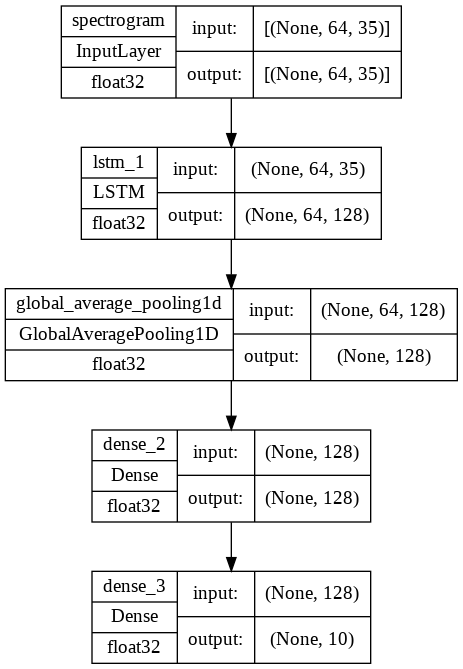

In [47]:
tf.keras.utils.plot_model(model_2, to_file='model_spectrogram.png',show_shapes=True,show_dtype=True,show_layer_names=True)


In [48]:
metrics = Metrics(validation_data=([X_test_spectrogram], y_test))

In [49]:
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)
import datetime

%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

model_2.compile(optimizer='Adam',
              loss='SparseCategoricalCrossentropy',
              metrics = ['Accuracy'])

model_2.fit(x=[X_train_spectrogram],
            y=y_train,
            validation_data=([X_test_spectrogram],y_test),
            epochs= 80,
            verbose=1,
            callbacks=[metrics,tensorboard_callback])



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Epoch 1/80
 1/44 [..............................] - ETA: 1:13 - loss: 2.5190 - Accuracy: 0.0312

19/19 [==============================] - 0s 3ms/step
val_F1_score:  0.31333333333333335
44/44 [==============================] - 3s 32ms/step - loss: 2.2058 - Accuracy: 0.2057 - val_loss: 2.0474 - val_Accuracy: 0.3133
Epoch 2/80
19/19 [==============================] - 0s 3ms/step
val_F1_score:  0.405
44/44 [==============================] - 1s 14ms/step - loss: 1.9609 - Accuracy: 0.3357 - val_loss: 1.8344 - val_Accuracy: 0.4050
Epoch 3/80
19/19 [==============================] - 0s 3ms/step
val_F1_score:  0.42166666666666675
44/44 [==============================] - 1s 14ms/step - loss: 1.7980 - Accuracy: 0.3871 - val_loss: 1.6881 - val_Accuracy: 0.4217
Epoch 4/80
19/19 [==============================] - 0s 3ms/step
val_F1_score:  0.47
44/44 [==============================] - 1s 14ms/step - loss: 1.6378 - Accuracy: 0.4664 - val_loss: 1.5619 - val_Accuracy: 0.4700
Epoch 5/80
19/19 [==============================] - 0s 3ms/step
val_F1_score:  0.5283333333333333
44/44 [===================

In [ ]:
tensorboard --logdir logs/fit


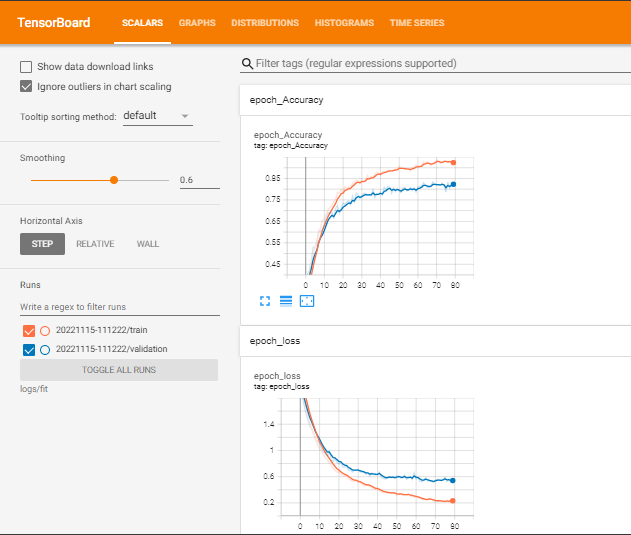

### 3. Data augmentation with raw features 

Till now we have done with 2000 samples only. It is very less data. We are giving the process of generating augmented data below.

There are two types of augmentation:
1. time stretching - Time stretching either increases or decreases the length of the file. For time stretching we move the file 30% faster or slower
2. pitch shifting - pitch shifting moves the frequencies higher or lower. For pitch shifting we shift up or down one half-step.


In [61]:
## generating augmented data. 
def generate_augmented_data(file_path):
    augmented_data = []
    samples = load_wav(file_path,get_duration=False)
    for time_value in [0.7, 1, 1.3]:
        for pitch_value in [-1, 0, 1]:
            time_stretch_data = librosa.effects.time_stretch(samples, rate=time_value)
            final_data = librosa.effects.pitch_shift(time_stretch_data, sr=sample_rate, n_steps=pitch_value)
            augmented_data.append(final_data)
    return augmented_data

In [63]:
temp_path = df_audio.iloc[0].path
aug_temp = generate_augmented_data(path+'/'+temp_path)

In [64]:
len(aug_temp)

9

## Follow the steps 

1. Split data 'df_audio' into train and test (80-20 split)

2. We have 2000 data points(1600 train points, 400 test points) 



In [91]:
X_train, X_test, y_train, y_test=train_test_split(df_audio['path'],
                                                  df_audio['label'],
                                                  random_state=45,
                                                  test_size=0.2,
                                                  stratify=df_audio['label'])

3. Do augmentation only on X_train,pass each point of X_train to generate_augmented_data function.After augmentation we will get 14400 train points. Make sure that you are augmenting the corresponding class labels (y_train) also.
4. Preprocess your X_test using load_wav function.
5. Convert the augmented_train_data and test_data to numpy arrays.
6. Perform padding and masking on augmented_train_data and test_data.
7. After padding define the model similar to model 1 and fit the data

In [102]:
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

In [92]:


augmented_train_data = []
y_train_aug = []

print(X_train.shape)
for i in tqdm(range(len(X_train)),desc='augmenting x_train'):
    temp_path = X_train.iloc[i]
    augmented_train_data.append(generate_augmented_data(path+'/'+temp_path))
print("done")
print()

for j in tqdm(range(len(y_train)),desc='augmenting y_train'):
    temp_label = y_train.iloc[j]
    y_train_aug.append([temp_label]*9)
print("done")    
    
augmented_train_data = np.array(augmented_train_data)
y_train_aug = np.array(y_train_aug)

X_train_augmented = augmented_train_data.flatten()
y_train_augmented = y_train_aug.flatten()

print(X_train_augmented.shape)

(1600,)


augmenting x_train:   0%|          | 0/1600 [00:00<?, ?it/s]

done



augmenting y_train:   0%|          | 0/1600 [00:00<?, ?it/s]

done
(14400,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  app.launch_new_instance()


In [94]:
print("Before augmentation")
print(X_train.iloc[1])
print(y_train.iloc[1])
print(len(X_train))
print()
print("After augmentation")
print(X_train_augmented[1])
print(y_train_augmented[1])
print(X_train_augmented.shape)

Before augmentation
2_theo_26.wav
2
1600

After augmentation
[-4.4406555e-05 -7.8914563e-05 -7.7527562e-05 ... -4.1745257e-04
 -4.6496090e-04 -5.0531642e-04]
8
(14400,)


<font color='red'> Note </font> - While fitting your model on the augmented data for model 3 you might face Resource exhaust error. One simple hack to avoid that is save the augmented_train_data,augment_y_train,test_data and y_test to Drive or into your local system. Then restart the runtime so that now you can train your model with full RAM capacity. Upload these files again in the new runtime session perform padding and masking and then fit your model.

In [97]:
import pickle
file = open('augmented.pkl', 'wb')

# save all your results to disk so that, no need to run all again. 
pickle.dump((X_train_augmented, y_train_augmented),file)

file.close()

In [106]:
#load_wav on test data

X_test_processed_list = []
for file_name in tqdm(X_test,desc='preprocessing test data'):
    audio_file = path+'/'+file_name
    X_test_processed_list.append(load_wav(x=audio_file))

X_test_processed_list =np.array(X_test_processed_list)

X_test_processed = pd.DataFrame(X_test_processed_list,columns=['raw_data','duration'])


print("After preprocessing test data",X_test_processed_list[90])    

preprocessing test data:   0%|          | 0/400 [00:00<?, ?it/s]

After preprocessing test data [array([-7.8219156e-05, -1.6608357e-04, -1.8105215e-04, ...,
         1.9130365e-04,  6.7368208e-05,  0.0000000e+00], dtype=float32)
 0.20802721088435375]


In [105]:
print(type(X_train_augmented))
print(type(X_test_processed_list))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [107]:
max_length  = 17640

X_train_pad_seq = tf.keras.utils.pad_sequences(sequences = X_train_augmented, 
                                                maxlen = max_length, 
                                                dtype='float32',
                                                padding='post',
                                                truncating='post',        
                                                value = 0.0
                                                )

X_test_pad_seq = tf.keras.utils.pad_sequences(sequences = X_test_processed['raw_data'].values, 
                                                maxlen = max_length, 
                                                dtype='float32',
                                                padding='post',
                                                truncating='post',   
                                                value = 0.0
                                                )

print(X_train_pad_seq[99])
print(len(X_train_pad_seq[99]))

[0.00062493 0.00074096 0.00069462 ... 0.0003358  0.00040042 0.00046034]
17640


In [108]:
X_train_mask = np.where(X_train_pad_seq != 0, 1, 0) 
X_train_mask = X_train_mask.astype(bool)

X_test_mask = np.where(X_test_pad_seq != 0, 1, 0)
X_test_mask = X_test_mask.astype(bool)

In [109]:
input_layer= Input(shape=(17640,1),name='pad_sequence layer',dtype='float32')

masking_input_layer = Input(shape=(17640,),name='masked_input layer',dtype='bool')

lstm_layer = LSTM(units=128,activation='tanh')(inputs=input_layer, mask=masking_input_layer)

lstm_output = Dense(units=128, activation='relu',kernel_initializer='he_uniform')(lstm_layer)


output_layer = Dense(units=10, activation='softmax')(lstm_output)

model_3 = Model(inputs=[input_layer,masking_input_layer],
                outputs=output_layer)

model_3.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 pad_sequence layer (InputLayer  [(None, 17640, 1)]  0           []                               
 )                                                                                                
                                                                                                  
 masked_input layer (InputLayer  [(None, 17640)]     0           []                               
 )                                                                                                
                                                                                                  
 lstm_2 (LSTM)                  (None, 128)          66560       ['pad_sequence layer[0][0]',     
                                                                  'masked_input layer[0][0]'

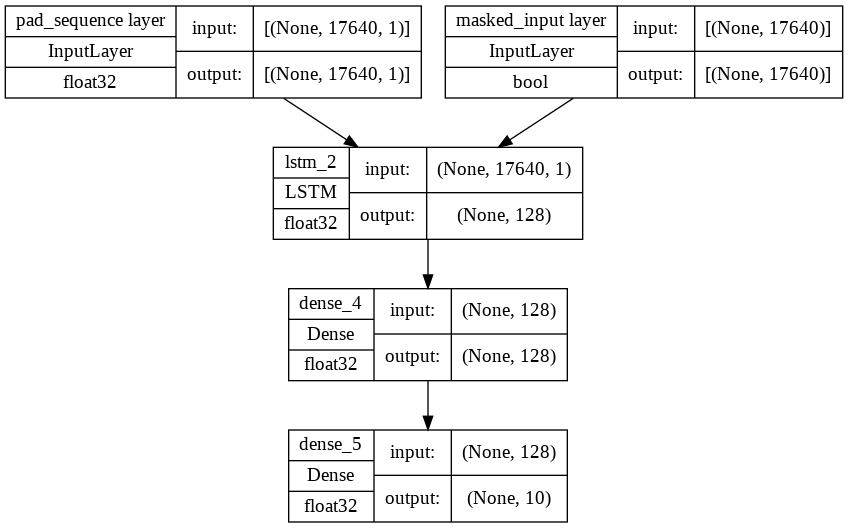

In [112]:
tf.keras.utils.plot_model(model_3, to_file='model_augmented.png',show_shapes=True,show_dtype=True,show_layer_names=True)


In [111]:
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)
import datetime

%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)
metrics = Metrics(validation_data=([X_test_pad_seq,X_test_mask], y_test))

model_3.compile(optimizer='Adam',
              loss='SparseCategoricalCrossentropy',
              metrics = ['Accuracy'])

model_3.fit(x=[X_train_pad_seq,X_train_mask],
            y=y_train_augmented,
          validation_data=([X_test_pad_seq,X_test_mask],y_test),
          epochs=3,
          verbose=1,
          callbacks=[metrics,tensorboard_callback])



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Epoch 1/3
13/13 [==============================] - 4s 231ms/step
val_F1_score:  0.10000000000000002
450/450 [==============================] - 276s 606ms/step - loss: 2.3031 - Accuracy: 0.0918 - val_loss: 2.3026 - val_Accuracy: 0.1000
Epoch 2/3
13/13 [==============================] - 3s 231ms/step
val_F1_score:  0.10000000000000002
450/450 [==============================] - 270s 599ms/step - loss: 2.3031 - Accuracy: 0.0969 - val_loss: 2.3027 - val_Accuracy: 0.1000
Epoch 3/3
13/13 [==============================] - 3s 230ms/step
val_F1_score:  0.10000000000000002
450/450 [==============================] - 274s 608ms/step - loss: 2.3031 - Accuracy: 0.0934 - val_loss: 2.3026 - val_Accuracy: 0.1000


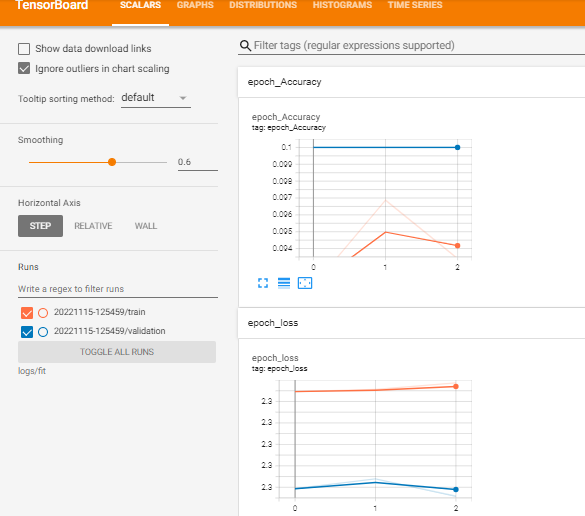

### 4. Data augmentation with spectogram data

1. use convert_to_spectrogram and convert the padded data from train and test data to spectogram data.
2. The shape of train data will be 14400 x 64 x 35 and shape of test_data will be 400 x 64 x35
3. Define the model similar to model 2 and fit the data

In [114]:
##use convert_to_spectrogram and convert every raw sequence in X_train_pad_seq and X_test_pad-seq.
## save those all in the X_train_spectrogram and X_test_spectrogram ( These two arrays must be numpy arrays)
X_train_spectrogram =[]
for raw_data in tqdm(X_train_pad_seq,desc='spectrogram on train data'):
 X_train_spectrogram.append(np.array(convert_to_spectrogram(raw_data)))

X_train_spectrogram = np.array(X_train_spectrogram)
print(type(X_train_spectrogram))
print(X_train_spectrogram.shape)
print("===="*30)

X_test_spectrogram =[]
for raw_data in tqdm(X_test_pad_seq,desc='spectrogram on test data'):
 X_test_spectrogram.append(np.array(convert_to_spectrogram(raw_data)))

X_test_spectrogram = np.array(X_test_spectrogram)
print(type(X_test_spectrogram))
print(X_test_spectrogram.shape)


spectrogram on train data:   0%|          | 0/14400 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
(14400, 64, 35)


spectrogram on test data:   0%|          | 0/400 [00:00<?, ?it/s]

<class 'numpy.ndarray'>
(400, 64, 35)


In [115]:
# write the architecture of the model
#print model.summary and make sure that it is following point 2 mentioned above
input_layer= Input(shape=(64,35),name='spectrogram',dtype='float32')

lstm_layer = LSTM(units=128,activation='tanh',return_sequences=True,kernel_initializer='he_uniform')(input_layer)

global_pooling = GlobalAveragePooling1D()(lstm_layer)

dense_layer = Dense(units=128, activation='relu',kernel_initializer='he_uniform')(global_pooling)

output_layer = Dense(units=10, activation='softmax')(dense_layer)

model_4 = Model(inputs=[input_layer],
                outputs=output_layer)

model_4.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 spectrogram (InputLayer)    [(None, 64, 35)]          0         
                                                                 
 lstm_3 (LSTM)               (None, 64, 128)           83968     
                                                                 
 global_average_pooling1d_1   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_____________________________________________________

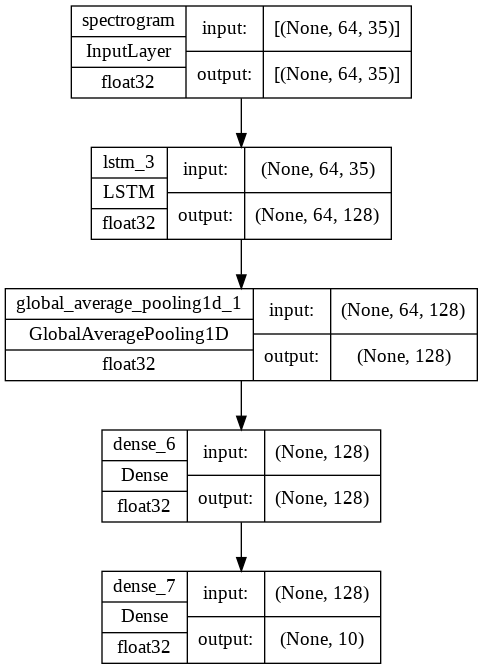

In [116]:
tf.keras.utils.plot_model(model_4, to_file='model_spectrogram_augmented.png',show_shapes=True,show_dtype=True,show_layer_names=True)


In [117]:
metrics = Metrics(validation_data=([X_test_spectrogram], y_test))
#train your model
#model1.fit([X_train_pad_seq,X_train_mask],y_train_int,.........)
import datetime

%load_ext tensorboard

# Clear any logs from previous runs
!rm -rf ./logs/

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

model_4.compile(optimizer='Adam',
              loss='SparseCategoricalCrossentropy',
              metrics = ['Accuracy'])

model_4.fit(x=[X_train_spectrogram],
            y=y_train_augmented,
            validation_data=([X_test_spectrogram],y_test),
            epochs= 30,
            verbose=1,
            callbacks=[metrics,tensorboard_callback])



The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Epoch 1/30
  1/450 [..............................] - ETA: 11:02 - loss: 2.2802 - Accuracy: 0.1250

13/13 [==============================] - 0s 3ms/step
val_F1_score:  0.5175
450/450 [==============================] - 5s 9ms/step - loss: 1.8760 - Accuracy: 0.3415 - val_loss: 1.4469 - val_Accuracy: 0.5175
Epoch 2/30
13/13 [==============================] - 0s 3ms/step
val_F1_score:  0.61
450/450 [==============================] - 3s 7ms/step - loss: 1.3850 - Accuracy: 0.5245 - val_loss: 1.1770 - val_Accuracy: 0.6100
Epoch 3/30
13/13 [==============================] - 0s 3ms/step
val_F1_score:  0.6575
450/450 [==============================] - 3s 7ms/step - loss: 1.1417 - Accuracy: 0.6123 - val_loss: 0.9720 - val_Accuracy: 0.6575
Epoch 4/30
13/13 [==============================] - 0s 3ms/step
val_F1_score:  0.705
450/450 [==============================] - 3s 7ms/step - loss: 0.9917 - Accuracy: 0.6592 - val_loss: 0.8280 - val_Accuracy: 0.7050
Epoch 5/30
13/13 [==============================] - 0s 3ms/step
val_F1_score:  0.65
450/450 [==============================] - 3s 7ms/step - loss:

In [ ]:
tensorboard --logdir logs/fit


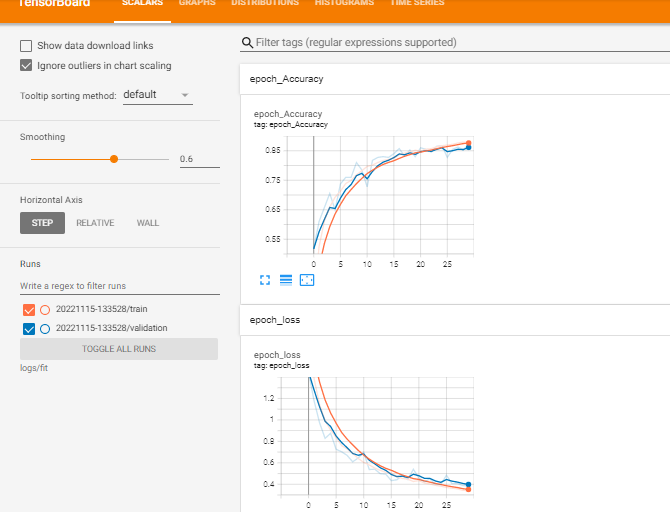

#Conclusion:

From above four models, Model-4(spectrogram+augmention) results are more promising. The model is not overfitting and the curves have lesser noise